# 四. 多重线性回归

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

## 1. 读取数据

In [29]:
data = pd.read_csv('./data.csv', encoding =  'UTF-8')
# data = pd.read_excel('./data_1.xlsx')
data

,x1,x2,x3,x4,x5,y
0,213432.8,7240,4.75,633.6,123.700000,622.33
1,253598.6,8755,4.75,712.6,121.400000,747.83
2,229495.5,8265,4.75,654.1,118.933333,646.92
3,219295.4,7780,4.75,717.0,121.333333,675.68
4,197920.0,7725,4.75,713.1,122.866667,745.90
...,...,...,...,...,...,...
60,34544.6,3210,5.49,133.3,95.333333,131.10
61,39767.4,3010,5.49,123.5,94.666667,122.80
62,35291.9,2920,5.49,113.6,92.333333,112.10
63,32537.3,3020,5.49,107.6,87.666667,110.00


提取因变量和自变量

In [30]:
# data.csv
X = data.iloc[:, 0:4]
Y = data.iloc[:, 5]
# data_1.xlsx
# X = data.iloc[:, 2:]
# Y = data.iloc[:, 1]

## 2. 判断多重共线性

ols法估计，R^2值高、F检验值高、且x1,x2，x3的t检验不显著

In [31]:
X1 = sm.add_constant(X) #加上一列常数1，这是回归模型中的常数项
reg = sm.OLS(Y, X1) #生成回归模型
model = reg.fit() #拟合数据
model.summary()

D:\DataScience\Anaconda202111\Anaconda202111\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     375.3
Date:                Mon, 13 Dec 2021   Prob (F-statistic):           1.04e-41
Time:                        03:21:44   Log-Likelihood:                -338.70
No. Observations:                  65   AIC:                             687.4
Df Residuals:                      60   BIC:                             698.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -50.6100     56.343     -0.898      0.373    -163.314      62.094
x1             0.0003      0.000      1.137      0.260      -0.000       0.001
x2             0.0054      0.005      1.116      0.269      -0.004       0.015
x3             5.0498      9.311      0.542      0.590     -13.576      23.675
x4             0.8801      0.083     10.637      0.000       0.715       1.046
==============================================================================
Omnibus:                       23.100   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.489
Skew:                          -0.568   Prob(JB):                     1.89e-31
Kurtosis:                      10.138   Cond. No.                     1.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

相关系数，对数据进行标准化处理（z-score标准化），可见有共线性

In [32]:
X = (X - X.mean())/np.std(X)
Y = (Y - Y.mean())/np.std(Y)
X.corr()

,x1,x2,x3,x4
x1,1.000000,0.703095,-0.464662,0.946787
x2,0.703095,1.000000,-0.059720,0.719972
x3,-0.464662,-0.059720,1.000000,-0.440459
x4,0.946787,0.719972,-0.440459,1.000000


分割数据

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7, random_state=1)

## 3. 消除多重共线性（PCA法）

对模型进行训练，返回降维后数据

In [34]:
pca = PCA(n_components='mle')
pca.fit(X_train)
X_train = pca.transform(X_train)
Y_train= (Y_train - Y_train.mean())/np.std(Y)
X_train 

array([[ 1.570424  , -0.93829933],
       [-2.30291629, -0.77854422],
       [ 1.08351187,  1.16012196],
       [ 0.32295353,  0.12070028],
       [-2.42997178, -1.28607699],
       [ 0.94438602,  1.02459601],
       [-2.32801688, -0.77829169],
       [-2.16486222, -0.67454388],
       [-1.93978149,  0.1724962 ],
       [ 0.01967437, -0.11280316],
       [-1.32073297,  0.75801798],
       [-1.97618471, -0.58105161],
       [-2.40838564, -1.22822222],
       [ 1.76706079, -0.97252849],
       [ 0.72709636,  1.02691268],
       [ 0.04243175,  0.80995503],
       [ 0.04285174,  1.64586828],
       [-0.56489392, -0.43367922],
       [ 0.76723663,  1.11295505],
       [ 2.05694611, -0.59451562],
       [ 1.09836063, -0.50078143],
       [ 0.36992529,  1.66065839],
       [ 0.06051041,  1.56617018],
       [-1.85288098,  1.97653715],
       [-2.34741203, -1.22598376],
       [-1.87922031,  0.17743686],
       [ 1.09024765,  1.25227001],
       [-2.57313034, -1.28851827],
       [ 0.86909685,

## 4. 重建线性回归

使用返回后的数据用线性回归模型建模，ols回归后R^2为0.933，p值小，说明模型拟合效果好

In [35]:
import statsmodels.api as sm
ols = sm.OLS(Y_train, X_train).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              297.6
Date:                Mon, 13 Dec 2021   Prob (F-statistic):                    6.49e-26
Time:                        03:21:44   Log-Likelihood:                         -4.5617
No. Observations:                  45   AIC:                                      13.12
Df Residuals:                      43   BIC:                                      16.74
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5940      0.024     24.341      0.000       0.545       0.643
x2             0.0673      0.040      1.674      0.101      -0.014       0.148
==============================================================================
Omnibus:                        1.742   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                0.878
Skew:                          -0.245   Prob(JB):                        0.645
Kurtosis:                       3.477   Cond. No.                         1.65
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
pca.explained_variance_ratio_

array([0.70103682, 0.2586647 ])

In [37]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 'mle',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_train, Y_train)
# X_test = data.iloc[64:, 0:4]
# y_test = data.iloc[64:, 5]

0.9326301840968643

## 5. 测试集验证

In [39]:
X_test = (X_test - X_test.mean())/np.std(X_test)
X_test = pca.transform(X_test)
X_test

array([[-1.51024245, -0.21962447],
       [-1.71293609, -0.7144579 ],
       [-1.73266676,  1.22094126],
       [ 3.12792355, -0.62282555],
       [-1.53383462,  0.70006592],
       [-1.52774474, -0.61751499],
       [ 1.95957121,  1.06265604],
       [ 1.02538936,  0.96167462],
       [-1.66458408,  1.77898767],
       [-0.59999531, -0.69743499],
       [ 0.46131224, -0.25488547],
       [-0.18712547, -0.6395096 ],
       [-2.119587  , -1.31631745],
       [ 0.55904671, -0.25298001],
       [-0.7278439 , -0.4330191 ],
       [-1.87791862, -1.18051858],
       [-1.62320808,  0.16471934],
       [ 3.11298947, -0.74480309],
       [ 0.52238133,  1.1746119 ],
       [ 1.25089457,  1.03010045]])

预测值

In [40]:
y_pred = lr.predict(X_test)
y_pred

array([-0.91181478, -1.06549217, -0.94703505,  1.81600913, -0.86396872,
       -0.94897312,  1.23540678,  0.67373625, -0.86906112, -0.40329085,
        0.25686302, -0.15416136, -1.34751326,  0.31504278, -0.46144457,
       -1.19483491, -0.95306198,  1.79893438,  0.3892856 ,  0.81228255])

真实值

In [41]:
Y_test

51   -1.037059
55   -1.185173
46   -0.921221
2     0.957926
47   -0.884966
53   -1.133002
21    1.404832
26    0.226110
44   -0.715188
40   -0.704134
36    0.158906
39   -0.300026
63   -1.415966
35    0.169517
27    0.345928
58   -1.367332
50   -1.137865
3     1.085083
31    0.095239
24    0.640387
Name: y, dtype: float64

比较真实值与预测值

Text(0, 0.5, 'The real Y')

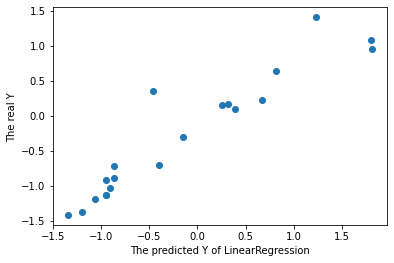

In [42]:
plt.scatter(y_pred, Y_test)
plt.xlabel('The predicted Y of LinearRegression')
plt.ylabel('The real Y')

R^2值为0.868，说明在测试集上回归效果较好，也说明PCA方法较好地消除了多重共线性

In [43]:
olsr = sm.OLS(y_pred, Y_test).fit()
olsr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.862
Method:                 Least Squares   F-statistic:                              125.4
Date:                Mon, 13 Dec 2021   Prob (F-statistic):                    8.25e-10
Time:                        03:21:44   Log-Likelihood:                         -7.7443
No. Observations:                  20   AIC:                                      17.49
Df Residuals:                      19   BIC:                                      18.48
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              1.0119      0.090     11.199      0.000       0.823       1.201
==============================================================================
Omnibus:                        7.487   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                6.318
Skew:                          -0.601   Prob(JB):                       0.0425
Kurtosis:                       5.477   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""